Consigna: 

a) Para el candidato asignado (FIT), visualizar la relación entre la variable del censo asignada
y el porcentaje de votos. El objetivo es cruzar los datos electorales con el Censo 2010
y sus respectivas geometrías. Interpretar politológicamente los resultados a nivel
circuito electoral. También deberá estar acompañado por visualizaciones.

Para tener en cuenta: recuerden que los radios censales y los circuitos electorales no
tienen la misma geometría, por la que deberán joinear. Para ello harán uso de una
tabla intermedia llamada “rosetta”.

P03 Edad Grupo 2

Importamos las librerías

In [1]:
import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, contextily as ctx, numpy as np,  seaborn as sns, os

#### Datos Electorales

 Importamos el CSV de los resultados, el SHP de los circuitos, y la tabla intermedia (rosetta)


(si están comprimidos hay que extraerlos)

In [163]:
# TODO Arregar los PATHS

circuitos = gpd.read_file('Datos/geometrias/CABA.shp')      # Se enuenctra en 'CABA.rar'

rosetta = pd.read_csv('Datos/rosetta.csv') 

resultados = pd.read_csv('Datos/datos_agrup.csv')           # Se encuentra en 'datos_agrup.rar'

Volverems a utilizar la función de porcentajes de la consigna 1)

In [3]:
def porcentaje_circuito(result_total, result_agrupacion):
    """
    Función que a partir de tablas con el cargo en disputa y una agrupación en específico, 
    calcula el porcentaje por circuito electoral
    """

    # Primero suma la cantidad de votos totales por circuito
    result_total_acotado = result_total[["CODIGO_CIRCUITO", "CODIGO_MESA", "VOTOS_AGRUPACION", "NOMBRE_REGION", "NOMBRE_AGRUPACION"]]

    result_total_circuito = (result_total_acotado.groupby(["NOMBRE_REGION", "CODIGO_CIRCUITO"]).sum())

    result_total_circuito = result_total_circuito.rename(columns={"VOTOS_AGRUPACION": "VOTOS_TOTALES"})


    # Luego suma la cantidad de votos de determinada agrupacion por circuito
    result_agrupacion_acotado = result_agrupacion[["CODIGO_CIRCUITO", "CODIGO_MESA", "VOTOS_AGRUPACION", "NOMBRE_REGION", "NOMBRE_AGRUPACION"]]

    result_agrupacion_circuito = (result_agrupacion_acotado.groupby(["NOMBRE_REGION", "CODIGO_CIRCUITO"]).sum())

    # Luego hace un merge, y calcula el porcentaje diviendo votos de la agrupacion por totales
    porcentaje_circuito = pd.merge(result_total_circuito, result_agrupacion_circuito, on=["NOMBRE_REGION","CODIGO_CIRCUITO"])

    porcentaje_circuito["PORCENTAJE_AGRUPACION"] = ((porcentaje_circuito["VOTOS_AGRUPACION"] / porcentaje_circuito["VOTOS_TOTALES"]) * 100).round(2)


    return porcentaje_circuito

Construimos DataFrame con resultados totales y del FIT

In [4]:
resultCABA_pres_fit = resultados[(resultados["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultados["NOMBRE_AGRUPACION"] == "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD")]
resultCABA_pres_total = resultados[resultados["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República"]
porc_pres_circuito_fit = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_fit)
result1 = porc_pres_circuito_fit.reset_index()

Para preparar el merge entre la geografía de los circuitos y la tabla intermedia, renombramos la columna y nos deshacemos de las mesas

In [5]:
rosetta.rename(columns={'CODIGO_CIRCUITO_2017': 'CODIGO_CIRCUITO'}, inplace= True)
series_rosetta = rosetta['CODIGO_CIRCUITO'].drop_duplicates()
series_rosetta.reset_index(drop=True, inplace= True)

circuitos_s = circuitos.sort_values(by='circuito')
circuitos_s_i = circuitos_s.reset_index(drop= True)

# Merge entre geografía de circuitos y tabla intermedia:

circuitos_rosetta = pd.merge(circuitos_s_i, series_rosetta, right_index= True, left_index= True)
circuitos_rosetta

,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry,CODIGO_CIRCUITO
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0001,02,001,"POLYGON Z ((-6497294.216 -4088142.493 0.000, -...",1001000001
1,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0002,02,001,"POLYGON Z ((-6498537.655 -4087740.684 0.000, -...",1001000002
2,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",1001000003
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0004,02,001,"POLYGON Z ((-6497398.411 -4087025.705 0.000, -...",1001000004
4,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0005,02,001,MULTIPOLYGON Z (((-6497185.903 -4082052.692 0....,1001000005
...,...,...,...,...,...,...,...,...,...
162,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0163,02,015,"POLYGON Z ((-6505348.070 -4083866.211 0.000, -...",1015000163
163,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0164,02,015,"POLYGON Z ((-6507652.050 -4084945.661 0.000, -...",1015000164
164,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0165,02,015,"POLYGON Z ((-6508638.340 -4081745.040 0.000, -...",1015000165
165,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0166,02,015,"POLYGON Z ((-6508941.686 -4083702.129 0.000, -...",1015000166


Merge entre los circuitos y los resultados electorales:

In [6]:
result_circ = pd.merge(result1, circuitos_rosetta, how= 'right', on= 'CODIGO_CIRCUITO')

# Lo volvemos a convertir en un GeoDataFrame, ya que en el último merge se volvió DF
result_gdf = gpd.GeoDataFrame(result_circ)

# Lo pasamos a Pseudo Mercator
result_gdf.to_crs(epsg = 3857, inplace= True)

result_gdf

,NOMBRE_REGION,CODIGO_CIRCUITO,VOTOS_TOTALES,VOTOS_AGRUPACION,PORCENTAJE_AGRUPACION,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
0,COMUNA 01,1001000001,7137.0,343.0,4.81,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0001,02,001,"POLYGON Z ((-6497294.216 -4112418.125 0.000, -..."
1,COMUNA 01,1001000002,6643.0,335.0,5.04,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0002,02,001,"POLYGON Z ((-6498537.655 -4112014.483 0.000, -..."
2,COMUNA 01,1001000003,3377.0,31.0,0.92,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4108992.762 0.000, -..."
3,NaN,1001000004,NaN,NaN,NaN,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0004,02,001,"POLYGON Z ((-6497398.411 -4111296.240 0.000, -..."
4,COMUNA 01,1001000005,5402.0,176.0,3.26,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0005,02,001,MULTIPOLYGON Z (((-6497185.903 -4106300.515 0....
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,COMUNA 15,1015000163,9538.0,444.0,4.66,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0163,02,015,"POLYGON Z ((-6505348.070 -4108122.319 0.000, -..."
163,COMUNA 15,1015000164,8654.0,455.0,5.26,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0164,02,015,"POLYGON Z ((-6507652.050 -4109206.698 0.000, -..."
164,COMUNA 15,1015000165,15832.0,700.0,4.42,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0165,02,015,"POLYGON Z ((-6508638.340 -4105991.457 0.000, -..."
165,COMUNA 15,1015000166,13176.0,588.0,4.46,01,Ciudad Autónoma de Buenos Aires,Comuna 15,Comuna 15,0166,02,015,"POLYGON Z ((-6508941.686 -4107957.487 0.000, -..."


Gráfico de votos absolutos del FIT por Circuito Electoral

Text(0.5, 1.0, 'Gráfico de votos absolutos del FIT por Circuito Electoral')

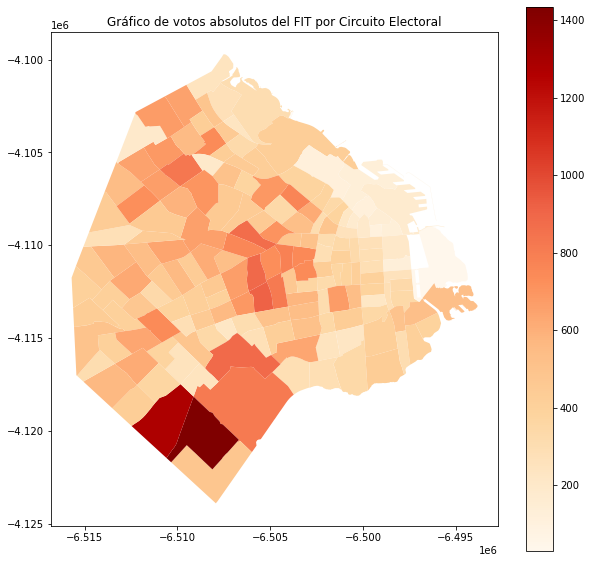

In [7]:
result_gdf.plot(column= 'VOTOS_AGRUPACION', figsize = (10,10), legend = True, cmap='OrRd')
plt.title('Gráfico de votos absolutos del FIT por Circuito Electoral')
# TODO Agregar títulos y ejes a todos los gráficos

Gráfico de porcentaje de votos del FIT por Circuito Electoral

Text(0.5, 1.0, 'Mapa de porcentaje de votos del FIT por circuito electoral')

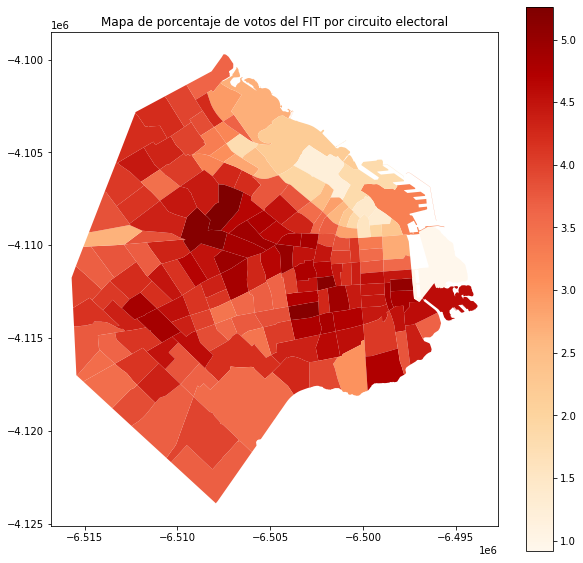

In [8]:
result_gdf.plot(column= 'PORCENTAJE_AGRUPACION', figsize = (10,10), legend = True, cmap='OrRd')
plt.title('Mapa de porcentaje de votos del FIT por circuito electoral')

Agrupación de los votos por comunas

In [9]:
comunas_gdf = result_gdf.dissolve(by= 'NOMBRE_REGION', aggfunc= 'sum')
comunas_gdf['PORCENTAJE_AGRUPACION'] = (comunas_gdf['VOTOS_AGRUPACION'] / comunas_gdf['VOTOS_TOTALES']) * 100

comunas_gdf

,geometry,CODIGO_CIRCUITO,VOTOS_TOTALES,VOTOS_AGRUPACION,PORCENTAJE_AGRUPACION
NOMBRE_REGION,,,,,
COMUNA 01,MULTIPOLYGON Z (((-6498678.029 -4113779.174 0....,18018000186,122034.0,4368.0,3.579330
COMUNA 02,"POLYGON Z ((-6501471.703 -4109445.928 0.000, -...",10020000245,104294.0,2620.0,2.512129
COMUNA 03,"POLYGON Z ((-6502369.495 -4113760.640 0.000, -...",13039000468,117157.0,5124.0,4.373618
COMUNA 04,"POLYGON Z ((-6503224.094 -4117778.592 0.000, -...",15060000750,136899.0,5798.0,4.235239
COMUNA 05,"POLYGON Z ((-6502280.662 -4114287.598 0.000, -...",10050000625,121975.0,5740.0,4.705882
COMUNA 06,"POLYGON Z ((-6506910.885 -4113514.554 0.000, -...",7042000497,127594.0,5248.0,4.113046
COMUNA 07,"POLYGON Z ((-6508301.710 -4115705.163 0.000, -...",12084000966,134121.0,5247.0,3.912139
COMUNA 08,"POLYGON Z ((-6506311.986 -4121608.040 0.000, -...",4032000354,107120.0,4018.0,3.750934
COMUNA 09,"POLYGON Z ((-6511291.418 -4118607.962 0.000, -...",11099001056,116632.0,4568.0,3.916592


Gráfico de votos del FIT por Comuna

Text(0.5, 1.0, 'Mapa de votos del FIT por comuna')

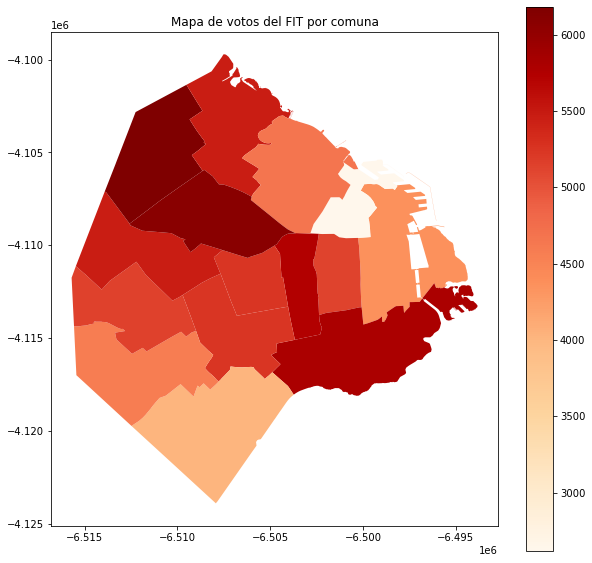

In [10]:
comunas_gdf.plot(column= 'VOTOS_AGRUPACION', figsize = (10,10), legend = True, cmap='OrRd')
plt.title('Mapa de votos del FIT por comuna')


Gráfico de porcentaje del FIT por Comuna

Text(0.5, 1.0, 'Mapa de porcentaje de votos del FIT por comuna')

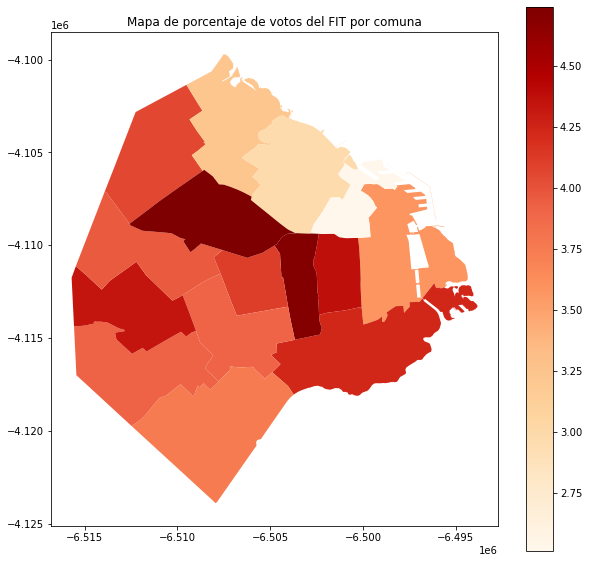

In [11]:
comunas_gdf.plot(column= 'PORCENTAJE_AGRUPACION', figsize = (10,10), legend = True, cmap='OrRd')
plt.title('Mapa de porcentaje de votos del FIT por comuna')


#### Datos del Censo

Importamos los .csv y las geografías de los radios censales

In [164]:
radios_censales = gpd.read_file('Datos/geometrias/cabaxrdatos.shp')     # Se encuentra en 'cabaxrdatos.rar'

censo_persona = pd.read_csv('Datos/persona.csv')        # Se encuentra en 'censo.rar'
censo_persona = censo_persona.drop(
    columns=["P01", "P05", "P06", "P07", "P12", "P08", "P09", "P10", "CONDACT"], axis=1)

censo_hogar = pd.read_csv('Datos/hogar.csv')         # Se encuentra en 'censo.rar'   
censo_hogar = censo_hogar.drop(
    columns=["H05", "H06", "H07", "H08", "H09", "H10", "H11", "H12", "H13", "H14", "H15", "H16", "H19A", "H19B", "H19C",
             "H19D", "PROP", "INDHAC"
             ], axis=1)

censo_vivienda = pd.read_csv('Datos/vivienda.csv')      # Se encuentra en 'censo.rar'
censo_vivienda = censo_vivienda.drop(
    columns=[
        "TIPVV", "V01", "V02", "V00", "URP", "INCALSERV", "INMAT", "MUNI", "LOCAL", "INCALCONS", "TOTHOG"
    ], axis=1)

censo_radio = pd.read_csv('Datos/radio.csv')        # Se encuentra en 'censo.rar'

censo_fraccion = pd.read_csv('Datos/frac.csv')       # Se encuentra en 'censo.rar'

censo_dpto = pd.read_csv('Datos/dpto.csv')      # Se encuentra en 'censo.rar'
censo_dpto = censo_dpto.drop(
    columns=["IDDPTO"], axis=1)

censo_prov = pd.read_csv('Datos/prov.csv')          # Se encuentra en 'censo.rar'
censo_prov = censo_prov.drop(
    columns=["CPV2010_REF_ID", "IDPROV", "PROV", "NOMPROV"], axis=1)

Preparación de las tablas de datos censales (frac, dpto, y prov) para mergear con geometría de los radios

In [13]:
censo_merge = pd.merge(censo_radio, censo_fraccion, on="FRAC_REF_ID")
censo_merge = pd.merge(censo_merge, censo_dpto, on="DPTO_REF_ID")
censo_merge = pd.merge(censo_merge, censo_prov, on="PROV_REF_ID")

radios_censales.sort_values(by= 'PAIS0210_I', inplace= True)
sub_radios = radios_censales[['PAIS0210_I', 'geometry']]
sub_radios.rename(columns={'PAIS0210_I': 'RADIO_REF_ID'}, inplace= True)


C:\Users\Usuario\anaconda3\envs\prueba38\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Merge de las tablas de datos censales y de geometrías de radios censales

In [14]:
radios_geom_merge = pd.merge(censo_merge, sub_radios, on= 'RADIO_REF_ID', how= 'inner')

censo_merge_2 = pd.merge(radios_geom_merge, censo_vivienda, on="RADIO_REF_ID")
censo_merge_2 = pd.merge(censo_merge_2, censo_hogar, on="VIVIENDA_REF_ID")
censo_merge_2 = pd.merge(censo_merge_2, censo_persona, on="HOGAR_REF_ID")

# Lo volvemos a convertir en GeoDataFrame
censo_gdf = gpd.GeoDataFrame(censo_merge_2)

# Lo pasamos al CRS 'Pseudo Mercator'
censo_gdf.to_crs(epsg= 3857, inplace= True)

censo_gdf

,RADIO_REF_ID,FRAC_REF_ID,IDRADIO,DPTO_REF_ID,IDFRAC,PROV_REF_ID,DPTO,NOMDPTO,geometry,VIVIENDA_REF_ID,HOGAR_REF_ID,NHOG,TOTPERS,ALGUNBI,PERSONA_REF_ID,P02,P03,EDADAGRU,EDADQUI
0,1,1,1,1,1,1,2001,Comuna 01 ...,"POLYGON ((-6508495.397 -4100981.488, -6508533....",1,1,1,1,0,1,2,61,2,13
1,1,1,1,1,1,1,2001,Comuna 01 ...,"POLYGON ((-6508495.397 -4100981.488, -6508533....",1,2,2,1,0,2,1,48,2,10
2,1,1,1,1,1,1,2001,Comuna 01 ...,"POLYGON ((-6508495.397 -4100981.488, -6508533....",1,3,4,2,0,3,1,65,3,14
3,1,1,1,1,1,1,2001,Comuna 01 ...,"POLYGON ((-6508495.397 -4100981.488, -6508533....",1,3,4,2,0,4,2,62,2,13
4,1,1,1,1,1,1,2001,Comuna 01 ...,"POLYGON ((-6508495.397 -4100981.488, -6508533....",1,4,6,8,1,5,1,20,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890146,3553,351,13,15,21,1,2015,Comuna 15 ...,"POLYGON ((-6498927.617 -4107533.615, -6498884....",1426438,1152599,1000,0,2,2890147,2,95,3,20
2890147,3553,351,13,15,21,1,2015,Comuna 15 ...,"POLYGON ((-6498927.617 -4107533.615, -6498884....",1426438,1152599,1000,0,2,2890148,2,91,3,19
2890148,3553,351,13,15,21,1,2015,Comuna 15 ...,"POLYGON ((-6498927.617 -4107533.615, -6498884....",1426438,1152599,1000,0,2,2890149,2,83,3,17
2890149,3553,351,13,15,21,1,2015,Comuna 15 ...,"POLYGON ((-6498927.617 -4107533.615, -6498884....",1426438,1152599,1000,0,2,2890150,2,89,3,18


#### Spatial Join de datos censales y datos electorales


La idea es calcular los centroides de los radios censales, y chequear cuales de esos centroides están contenidos en el área de un determinado circuito electoral


Calculamos el centroide de los radios y lo seteamos como su columna de geometrías

In [15]:
censo_gdf['centroide'] = censo_gdf.centroid
censo_centr = censo_gdf.set_geometry('centroide')

censo_centr.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

El Spatial Join

In [16]:
sjoin = gpd.sjoin(result_gdf, censo_centr, how= 'left', op= 'contains')
sub_sjoin = sjoin[['geometry_left','NOMBRE_REGION', 'CODIGO_CIRCUITO', 'VOTOS_TOTALES', 'VOTOS_AGRUPACION',
       'PORCENTAJE_AGRUPACION','geometry_right','RADIO_REF_ID', 'FRAC_REF_ID', 'IDRADIO', 'DPTO_REF_ID',
       'IDFRAC', 'PROV_REF_ID', 'DPTO', 'VIVIENDA_REF_ID', 'HOGAR_REF_ID', 'NHOG','PERSONA_REF_ID', 'P02', 'P03', 'EDADAGRU', 'EDADQUI']]   


df_final = gpd.GeoDataFrame(sub_sjoin, geometry= 'geometry_left')

#### Una prueba que decidimos tomar para ver si estaba bien el Spatial Join

Chequear los radios que de acuerdo al sjoin quedan adentro de determinado circuito, y chequear si coniciden

C:\Users\Usuario\anaconda3\envs\prueba38\lib\site-packages\contextily\tile.py:222: UserWarning: Persisting input arguments took 0.86s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  image = _fetch_tile(tile_url, wait, max_retries)


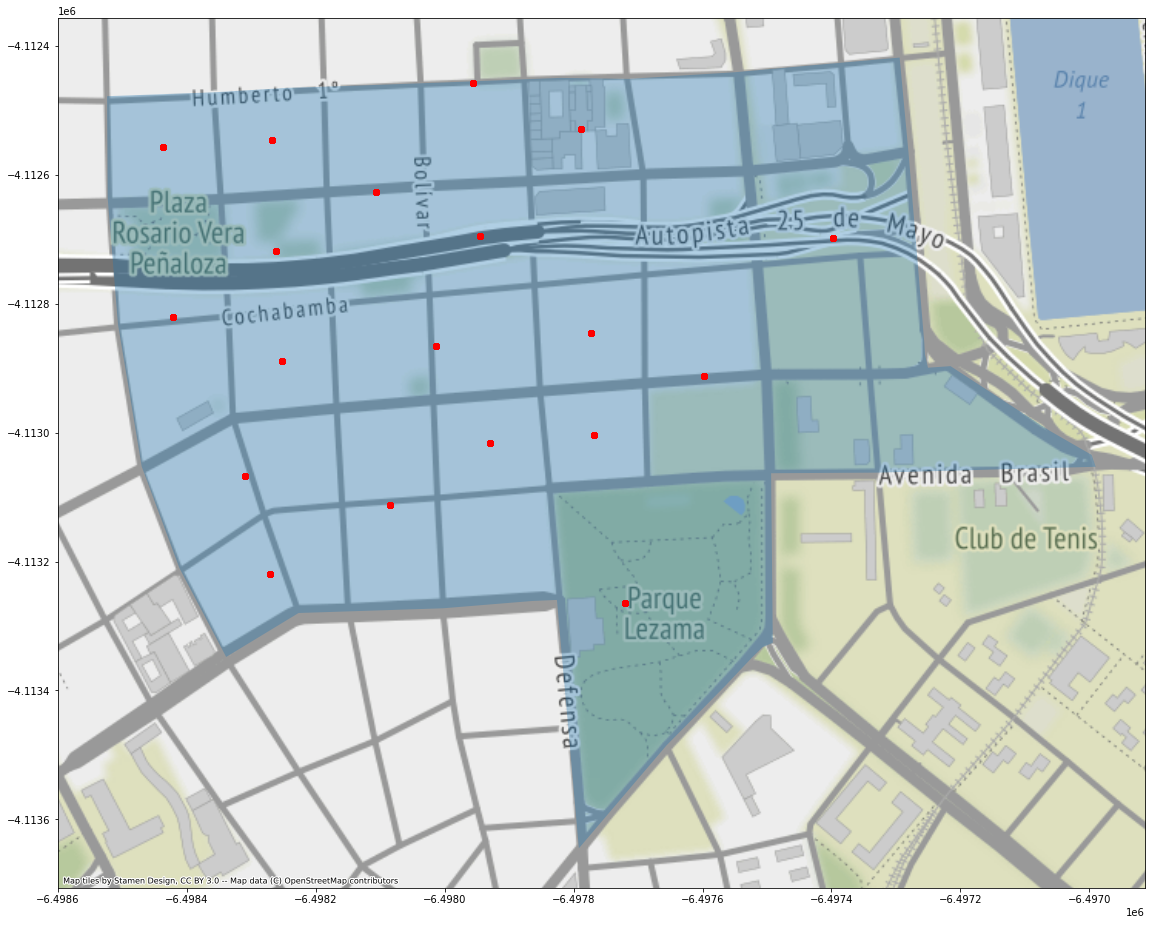

In [17]:
# PRUEBA 1: PRIMER CIRCUITO
prueba_circ1 =  df_final[df_final['CODIGO_CIRCUITO'] == 1001000001]
prueba_circ1b = prueba_circ1[['geometry_left']].drop_duplicates()

prueba_cens1 = prueba_circ1['RADIO_REF_ID'].unique()
prueba_cens1b = censo_centr[censo_centr['RADIO_REF_ID'].isin(prueba_cens1)]

fig, ax = plt.subplots(figsize = (20,16))
ax1= prueba_circ1b.plot(alpha=0.35, ax=ax)
ctx.add_basemap(ax1, zoom= 16)

ax2= prueba_cens1b.plot(color = 'red', ax=ax)
ctx.add_basemap(ax2, zoom= 16)

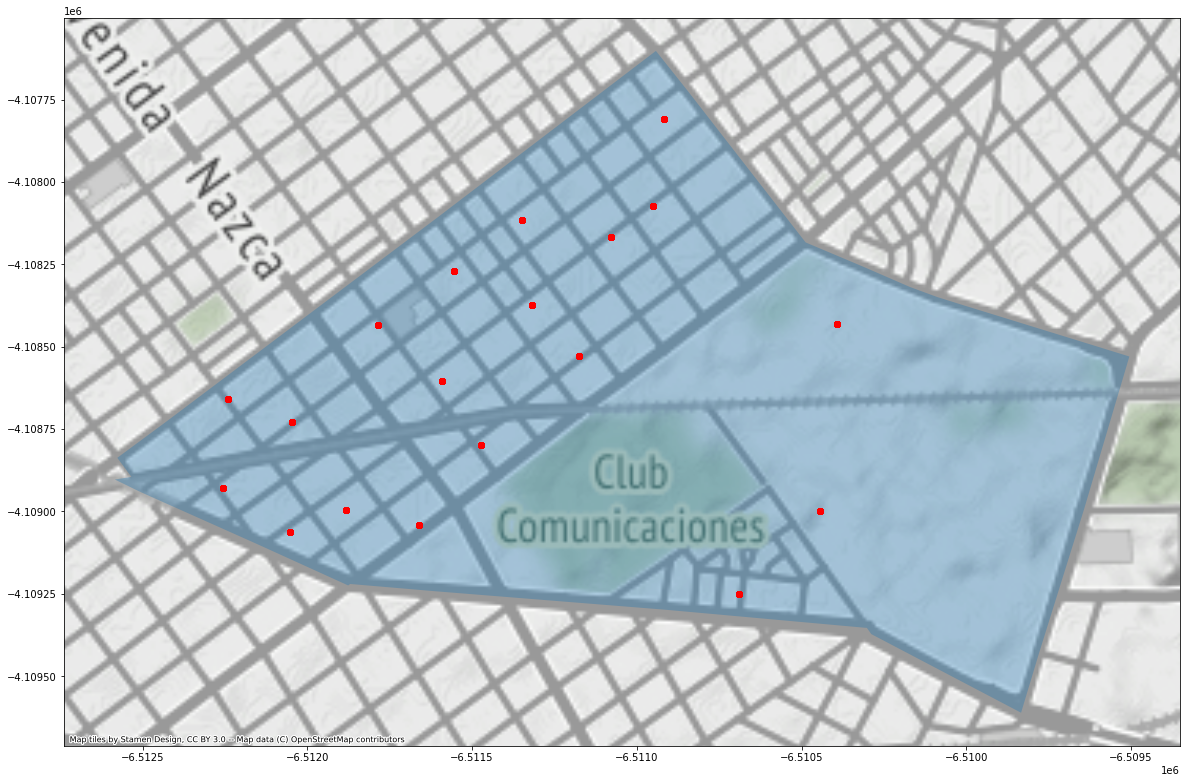

In [18]:
# PRUEBA 2: ÚLTIMO CIRCUITO
prueba_circ2 =  df_final[df_final['CODIGO_CIRCUITO'] == 1015000167]
prueba_circ2b = prueba_circ2[['geometry_left']].drop_duplicates()

prueba_cens2 = prueba_circ2['RADIO_REF_ID'].unique()
prueba_cens2b = censo_centr[censo_centr['RADIO_REF_ID'].isin(prueba_cens2)]

fig, ax = plt.subplots(figsize = (20,16))
ax3= prueba_circ2b.plot(ax=ax,alpha=0.35)
ctx.add_basemap(ax3, zoom= 14)
ax4= prueba_cens2b.plot(ax=ax, color = 'red')
ctx.add_basemap(ax4, zoom= 14)

#### Plot de radios y circuitos
También podemos realizar un plot de cimo encajan los radios en los circuitos

In [19]:
# plot_r_c = censo_gdf['geometry'].drop_duplicates()


# fig, ax = plt.subplots(figsize = (20,16)) 
# result_gdf.plot(ax=ax, alpha = 0.8, linewidth = 3, edgecolor = 'k')
# plot_r_c.geometry.plot(color=None,edgecolor='m',linewidth = 2,ax=ax, alpha = 0.3) 



### Ahora analizaremos un poco los datos de edad

#### Gráficamos el promedio de edades por comuna, solo para mayores de 16 años. 
(Todos los ciudadanos que pueden votar, por lo menos si se tiene en cuenta la edad, y no otras variables como ciudadanía)

In [20]:
sub_df_final =df_final[['geometry_left', 'NOMBRE_REGION', 'CODIGO_CIRCUITO', 'VOTOS_TOTALES',
       'VOTOS_AGRUPACION', 'PORCENTAJE_AGRUPACION','RADIO_REF_ID', 'VIVIENDA_REF_ID', 'HOGAR_REF_ID', 
       'PERSONA_REF_ID', 'P02', 'P03', 'EDADAGRU', 'EDADQUI']]

# Me quedo solo con los mayores a 15
df_m16 = sub_df_final[sub_df_final['P03'] > 15]

# Para poder agrupar por circuitos y comunas necesito deshacerme parcialmente de las geometrías, ya que no las puedo agrupar (tira error)
m16_geom = df_m16[['geometry_left', 'NOMBRE_REGION', 'CODIGO_CIRCUITO', 'VOTOS_TOTALES']]
m16_datos = df_m16[['NOMBRE_REGION', 'CODIGO_CIRCUITO', 'VOTOS_TOTALES',
       'VOTOS_AGRUPACION', 'PORCENTAJE_AGRUPACION', 'RADIO_REF_ID',
       'VIVIENDA_REF_ID', 'HOGAR_REF_ID', 'PERSONA_REF_ID', 'P02', 'P03',
       'EDADAGRU', 'EDADQUI']]

# Hago el groupby, me quedo con la MEDIA y la MEDIANA
m16_agr = m16_datos.groupby(['NOMBRE_REGION', 'CODIGO_CIRCUITO', 'VOTOS_TOTALES'])[['VOTOS_AGRUPACION', 'PORCENTAJE_AGRUPACION','P03']].agg(['mean', 'median'])

# Vuelvo a combinar las geometrías con los datos censales
# El '.drop_duplicates()' para no tener un GDF innecesariamente largo
m16_agr_geom= pd.merge(m16_agr, m16_geom.drop_duplicates(), on= ['NOMBRE_REGION','CODIGO_CIRCUITO', 'VOTOS_TOTALES'])

# Renombro a nombres callable para plottear
m16_agr_geom.rename(columns={('VOTOS_AGRUPACION', 'mean'): 'VOTOS_AGRUPACION_mean',('VOTOS_AGRUPACION', 'median'): 'VOTOS_AGRUPACION_median', 
('PORCENTAJE_AGRUPACION', 'mean'): 'PORCENTAJE_AGRUPACION_mean',('PORCENTAJE_AGRUPACION', 'median'): 'PORCENTAJE_AGRUPACION_median',
('P03', 'mean'): 'P03_mean', ('P03', 'median'): 'P03_median',
'geometry_left': 'geometry'
}, inplace= True)

# Vuelvo a convertir en GDF
m16_gdf = gpd.GeoDataFrame(m16_agr_geom)

m16_gdf

C:\Users\Usuario\AppData\Local\Temp/ipykernel_7376/1107362209.py:20: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  m16_agr_geom= pd.merge(m16_agr, m16_geom.drop_duplicates(), on= ['NOMBRE_REGION','CODIGO_CIRCUITO', 'VOTOS_TOTALES'])


,NOMBRE_REGION,CODIGO_CIRCUITO,VOTOS_TOTALES,VOTOS_AGRUPACION_mean,VOTOS_AGRUPACION_median,PORCENTAJE_AGRUPACION_mean,PORCENTAJE_AGRUPACION_median,P03_mean,P03_median,geometry
0,COMUNA 01,1001000001,7137.0,343.0,343.0,4.81,4.81,46.616100,45.0,"POLYGON Z ((-6497294.216 -4112418.125 0.000, -..."
1,COMUNA 01,1001000002,6643.0,335.0,335.0,5.04,5.04,46.314717,44.0,"POLYGON Z ((-6498537.655 -4112014.483 0.000, -..."
2,COMUNA 01,1001000003,3377.0,31.0,31.0,0.92,0.92,45.788709,44.0,"POLYGON Z ((-6496304.252 -4108992.762 0.000, -..."
3,COMUNA 01,1001000005,5402.0,176.0,176.0,3.26,3.26,45.360414,42.0,MULTIPOLYGON Z (((-6497185.903 -4106300.515 0....
4,COMUNA 01,1001000006,11110.0,148.0,148.0,1.33,1.33,45.109587,42.0,"POLYGON Z ((-6499644.727 -4108928.934 0.000, -..."
...,...,...,...,...,...,...,...,...,...,...
161,COMUNA 15,1015000163,9538.0,444.0,444.0,4.66,4.66,43.301397,39.0,"POLYGON Z ((-6505348.070 -4108122.319 0.000, -..."
162,COMUNA 15,1015000164,8654.0,455.0,455.0,5.26,5.26,46.115533,43.0,"POLYGON Z ((-6507652.050 -4109206.698 0.000, -..."
163,COMUNA 15,1015000165,15832.0,700.0,700.0,4.42,4.42,43.929338,40.0,"POLYGON Z ((-6508638.340 -4105991.457 0.000, -..."
164,COMUNA 15,1015000166,13176.0,588.0,588.0,4.46,4.46,45.946160,43.0,"POLYGON Z ((-6508941.686 -4107957.487 0.000, -..."


Mapa de Media de edad y porcentaje electoral por circuito electoral

Text(0.5, 1.0, 'Mapa de media de edad cicuito electoral')

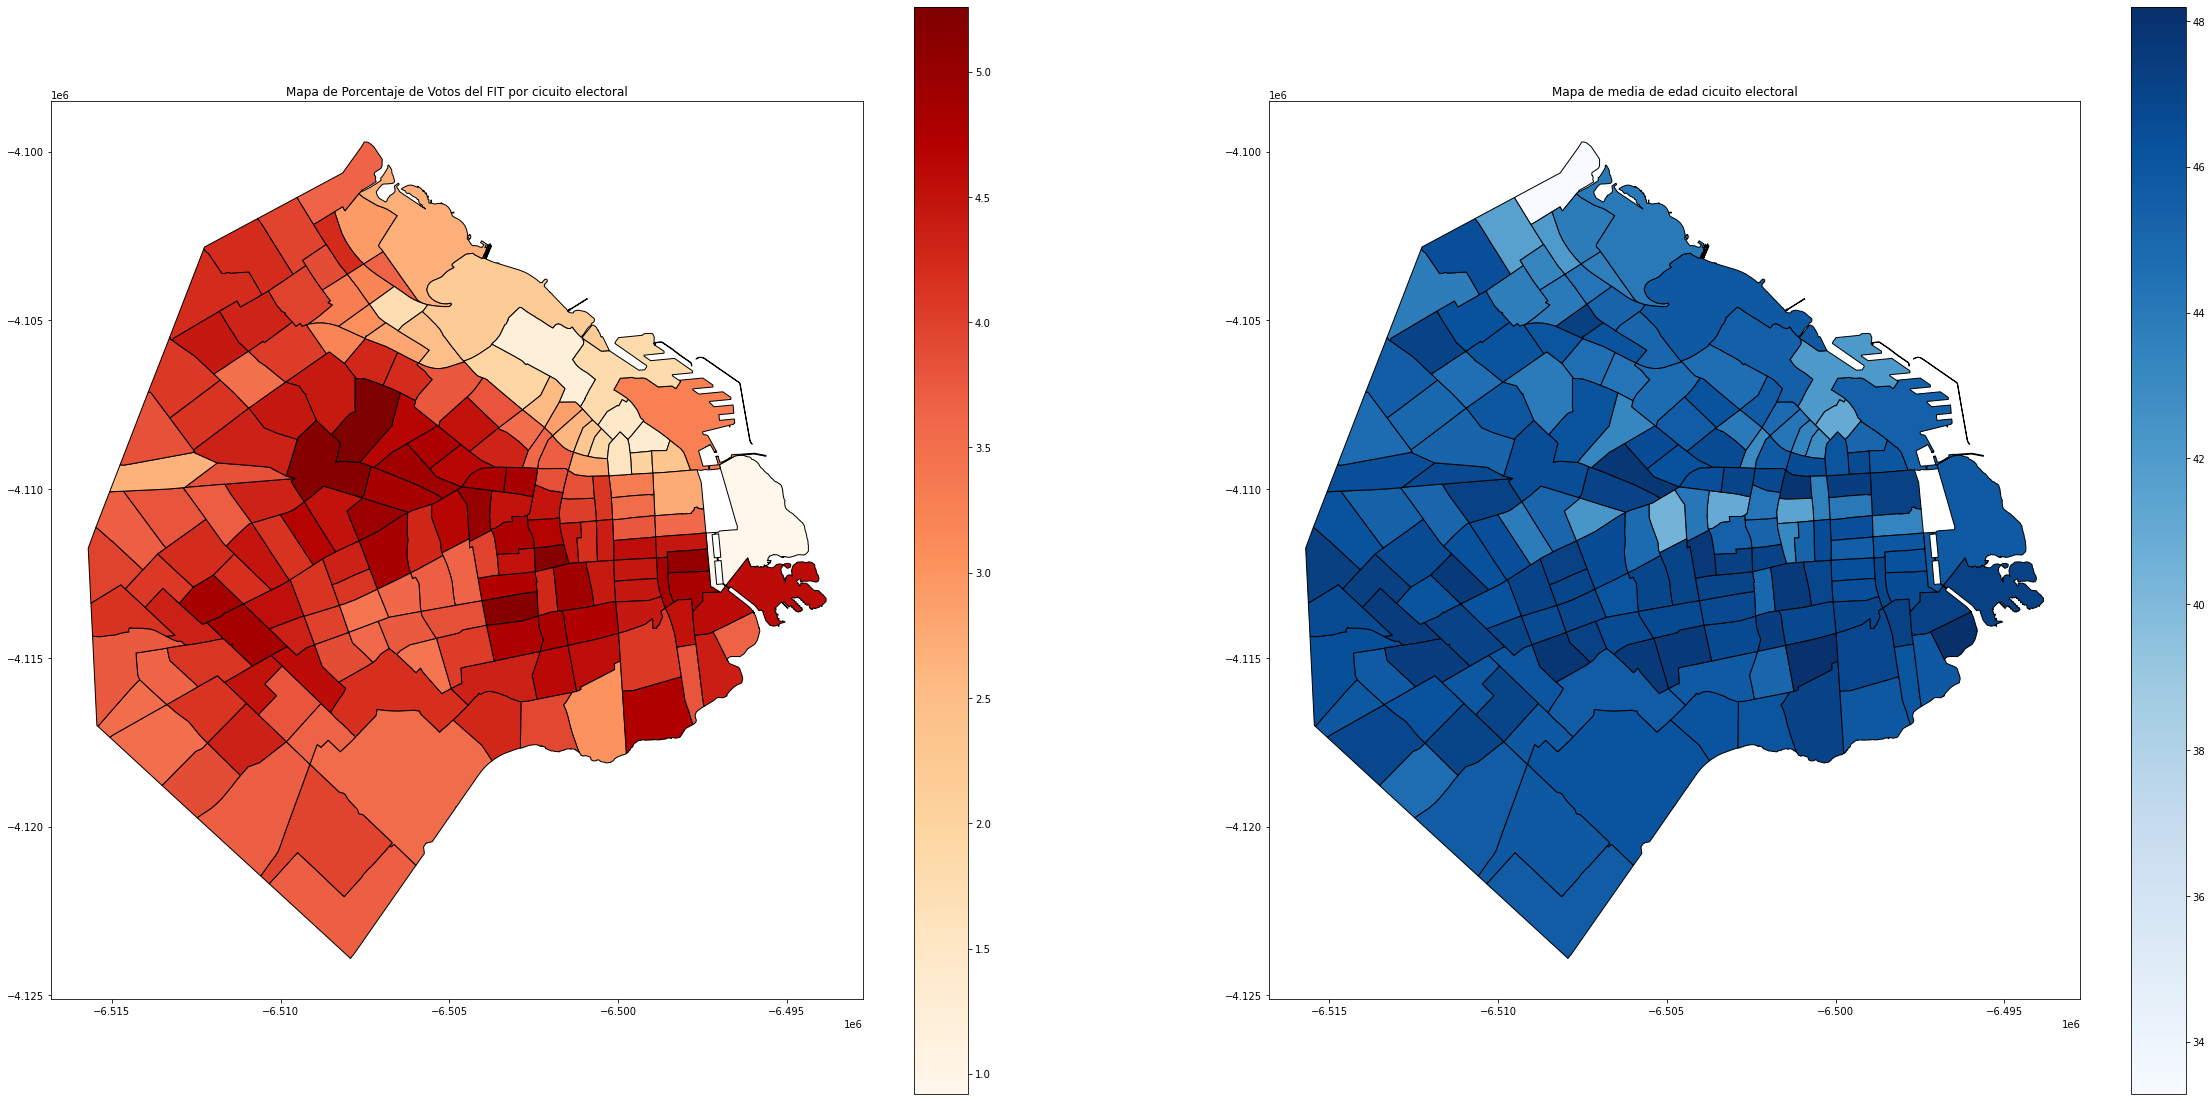

In [21]:
fig_dims= (40,20)
fig, (eje1, eje2) = plt.subplots(ncols= 2,figsize= fig_dims)
(m16_gdf.plot(ax=eje1, column= 'PORCENTAJE_AGRUPACION_mean', cmap= 'OrRd', edgecolor= 'k', legend= True)).set_title('Mapa de Porcentaje de Votos del FIT por cicuito electoral')
(m16_gdf.plot( column= 'P03_mean', cmap= 'Blues', edgecolor= 'k', legend= True, ax= eje2)).set_title('Mapa de media de edad cicuito electoral')


Puedo agrupar por comuna los datos censales

In [22]:
comunas_censo_gdf = m16_gdf.dissolve(by='NOMBRE_REGION', aggfunc=({'VOTOS_TOTALES': 'sum','VOTOS_AGRUPACION_mean': 'sum', 'P03_mean': 'mean', 'P03_median': 'median'}))
comunas_censo_gdf["PORCENTAJE_AGRUPACION"] = (comunas_censo_gdf["VOTOS_AGRUPACION_mean"] / comunas_censo_gdf["VOTOS_TOTALES"]) * 100

comunas_censo_gdf

,geometry,VOTOS_TOTALES,VOTOS_AGRUPACION_mean,P03_mean,P03_median,PORCENTAJE_AGRUPACION
NOMBRE_REGION,,,,,,
COMUNA 01,MULTIPOLYGON Z (((-6498678.029 -4113779.174 0....,122034.0,4368.0,46.036285,44.0,3.579330
COMUNA 02,"POLYGON Z ((-6501471.703 -4109445.928 0.000, -...",104294.0,2620.0,43.989535,40.0,2.512129
COMUNA 03,"POLYGON Z ((-6502369.495 -4113760.640 0.000, -...",117157.0,5124.0,45.450074,43.0,4.373618
COMUNA 04,"POLYGON Z ((-6503224.094 -4117778.592 0.000, -...",136899.0,5798.0,46.661513,44.0,4.235239
COMUNA 05,"POLYGON Z ((-6502280.662 -4114287.598 0.000, -...",121975.0,5740.0,45.965079,44.0,4.705882
COMUNA 06,"POLYGON Z ((-6506910.885 -4113514.554 0.000, -...",127594.0,5248.0,44.886380,43.0,4.113046
COMUNA 07,"POLYGON Z ((-6508301.710 -4115705.163 0.000, -...",134121.0,5247.0,47.018748,45.0,3.912139
COMUNA 08,"POLYGON Z ((-6506311.986 -4121608.040 0.000, -...",107120.0,4018.0,45.842632,42.5,3.750934
COMUNA 09,"POLYGON Z ((-6511291.418 -4118607.962 0.000, -...",116632.0,4568.0,46.165552,43.0,3.916592


Mapa de Media de edad y porcentaje electoral por Comuna

Text(0.5, 1.0, 'Mapa de media de edad por Comuna')

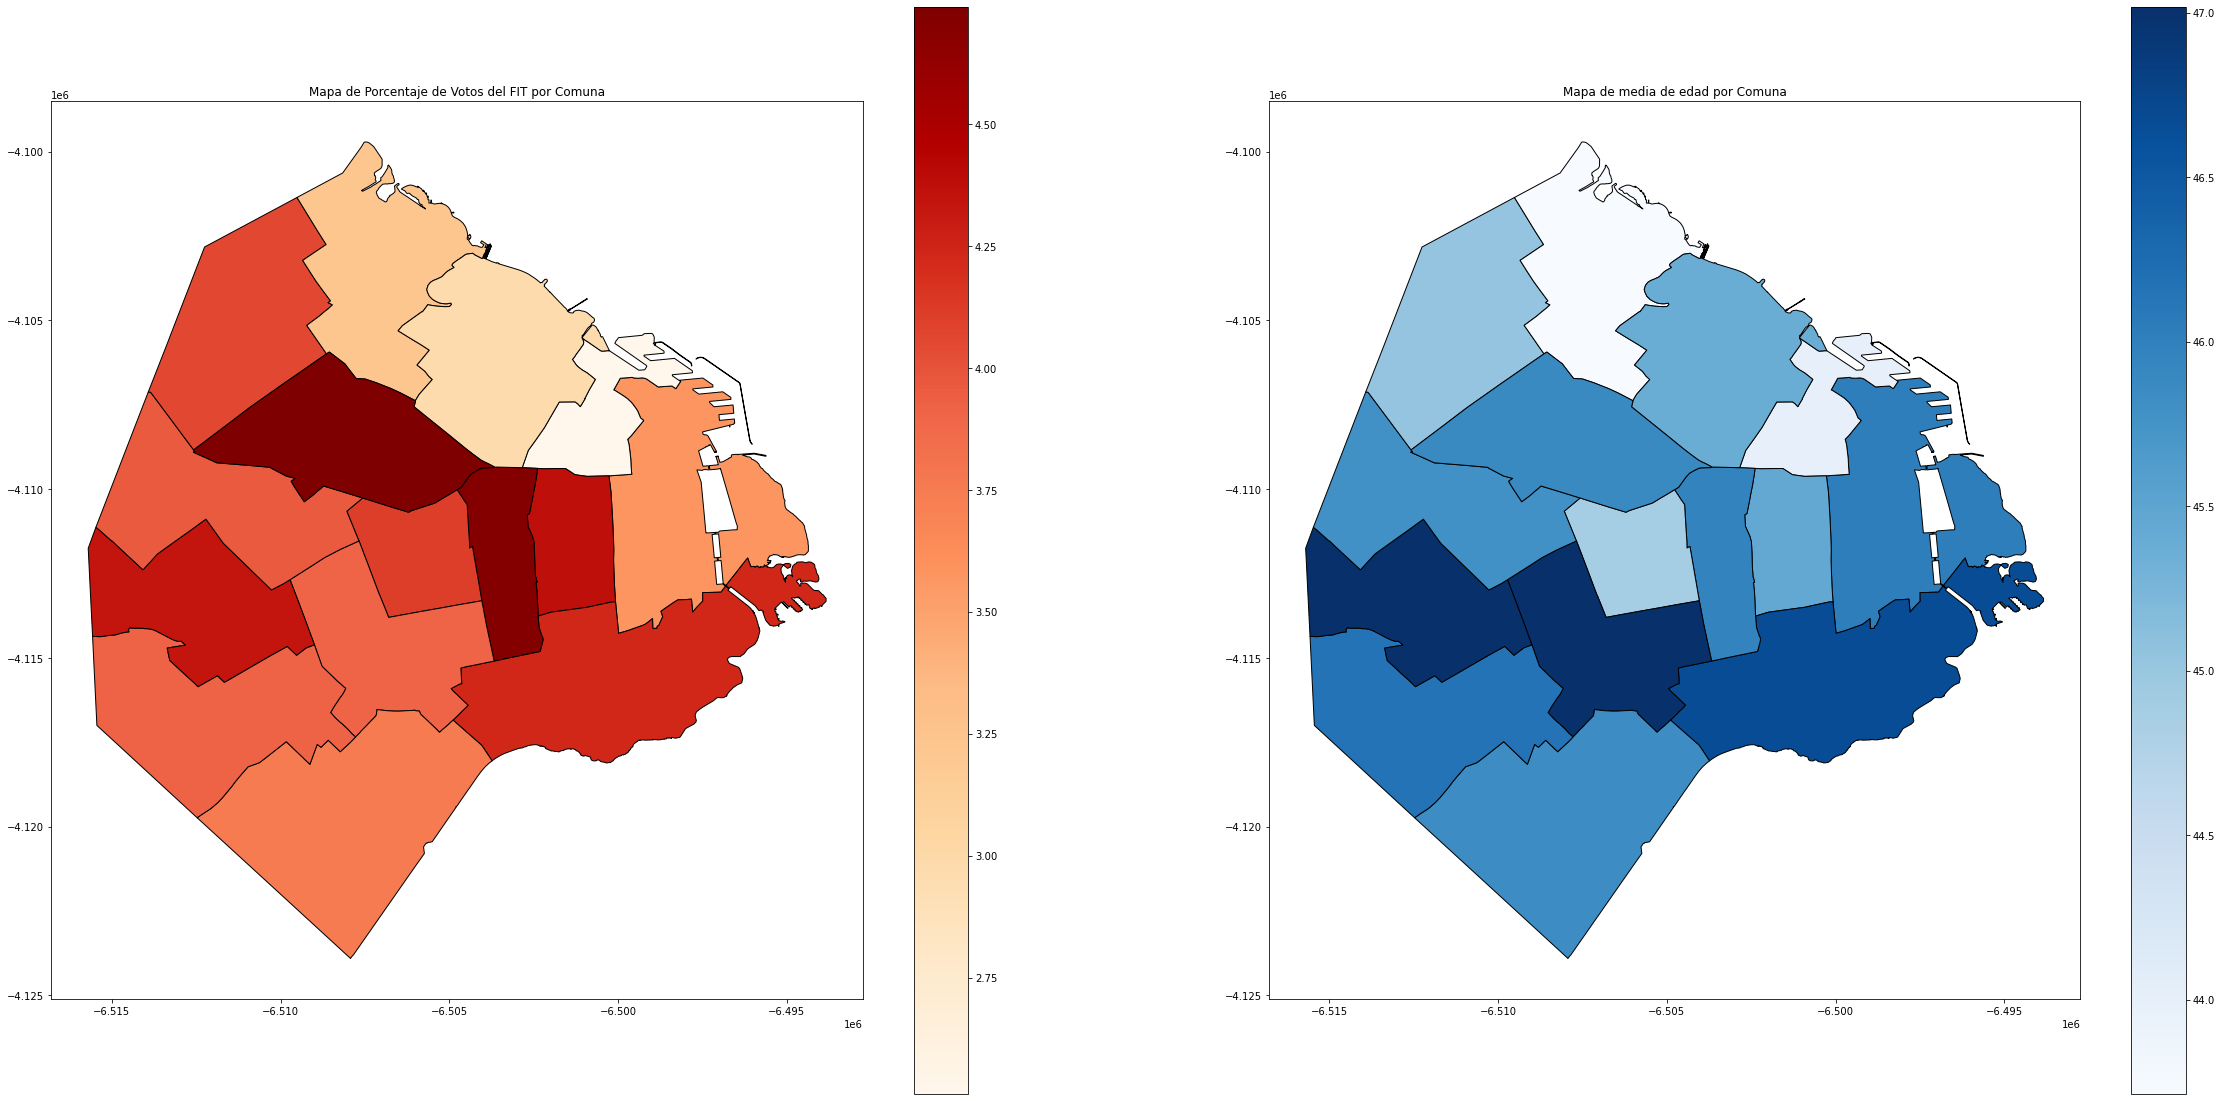

In [23]:
fig, (eje1, eje2) = plt.subplots(ncols= 2,figsize= fig_dims)
(comunas_censo_gdf.plot(ax=eje1, column= 'PORCENTAJE_AGRUPACION', cmap= 'OrRd', edgecolor= 'k', legend= True)).set_title('Mapa de Porcentaje de Votos del FIT por Comuna')
(comunas_censo_gdf.plot(column= 'P03_mean', cmap= 'Blues', edgecolor= 'k', legend= True, ax= eje2)).set_title('Mapa de media de edad por Comuna')


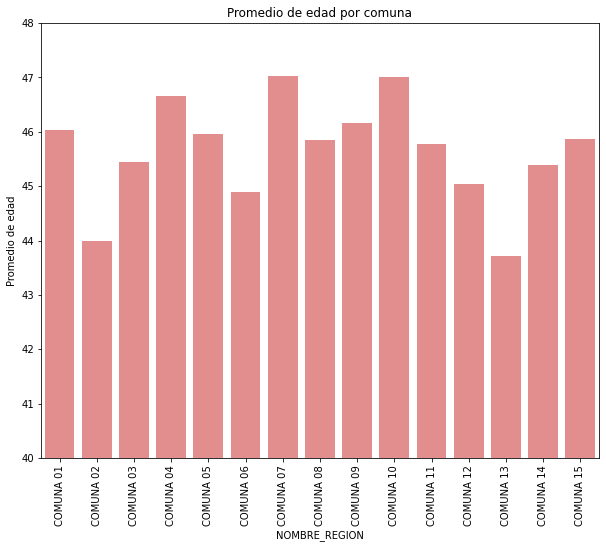

In [130]:
gr2 = comunas_censo_gdf.reset_index()
plt.subplots(figsize = (10,8))
fig = sns.barplot(data= gr2, x= 'NOMBRE_REGION', y= 'P03_mean', color="lightcoral")
fig.set(ylabel= "Promedio de edad", title= 'Promedio de edad por comuna', ylim= (40,48))
fig.tick_params(axis='x', rotation=90)



Podemos ver que la media de edades por comuna son bastante similares, los más altos son de 47 y los más bajos de 44

#### Visualizamos la correlación entre el promedio de edad por comuna y el voto al FIT por comuna 

In [158]:
df_correlacion_media_comuna = gr2[['PORCENTAJE_AGRUPACION', 'P03_mean']]

# Construímos matriz de correlación

matriz_corr_media_comuna = df_correlacion_media_comuna.corr()
matriz_corr_media_comuna



,PORCENTAJE_AGRUPACION,P03_mean
PORCENTAJE_AGRUPACION,1.000000,0.572308
P03_mean,0.572308,1.000000


Podemos observar que la correlación existente entre la media de edad por comuna y los votos totales al FIT para presidencia es media y positiva, siendo mayor a 0.5.

 #### Gráfico con promedio de edad por circuito (mayores de 16)

IndexError: list index out of range

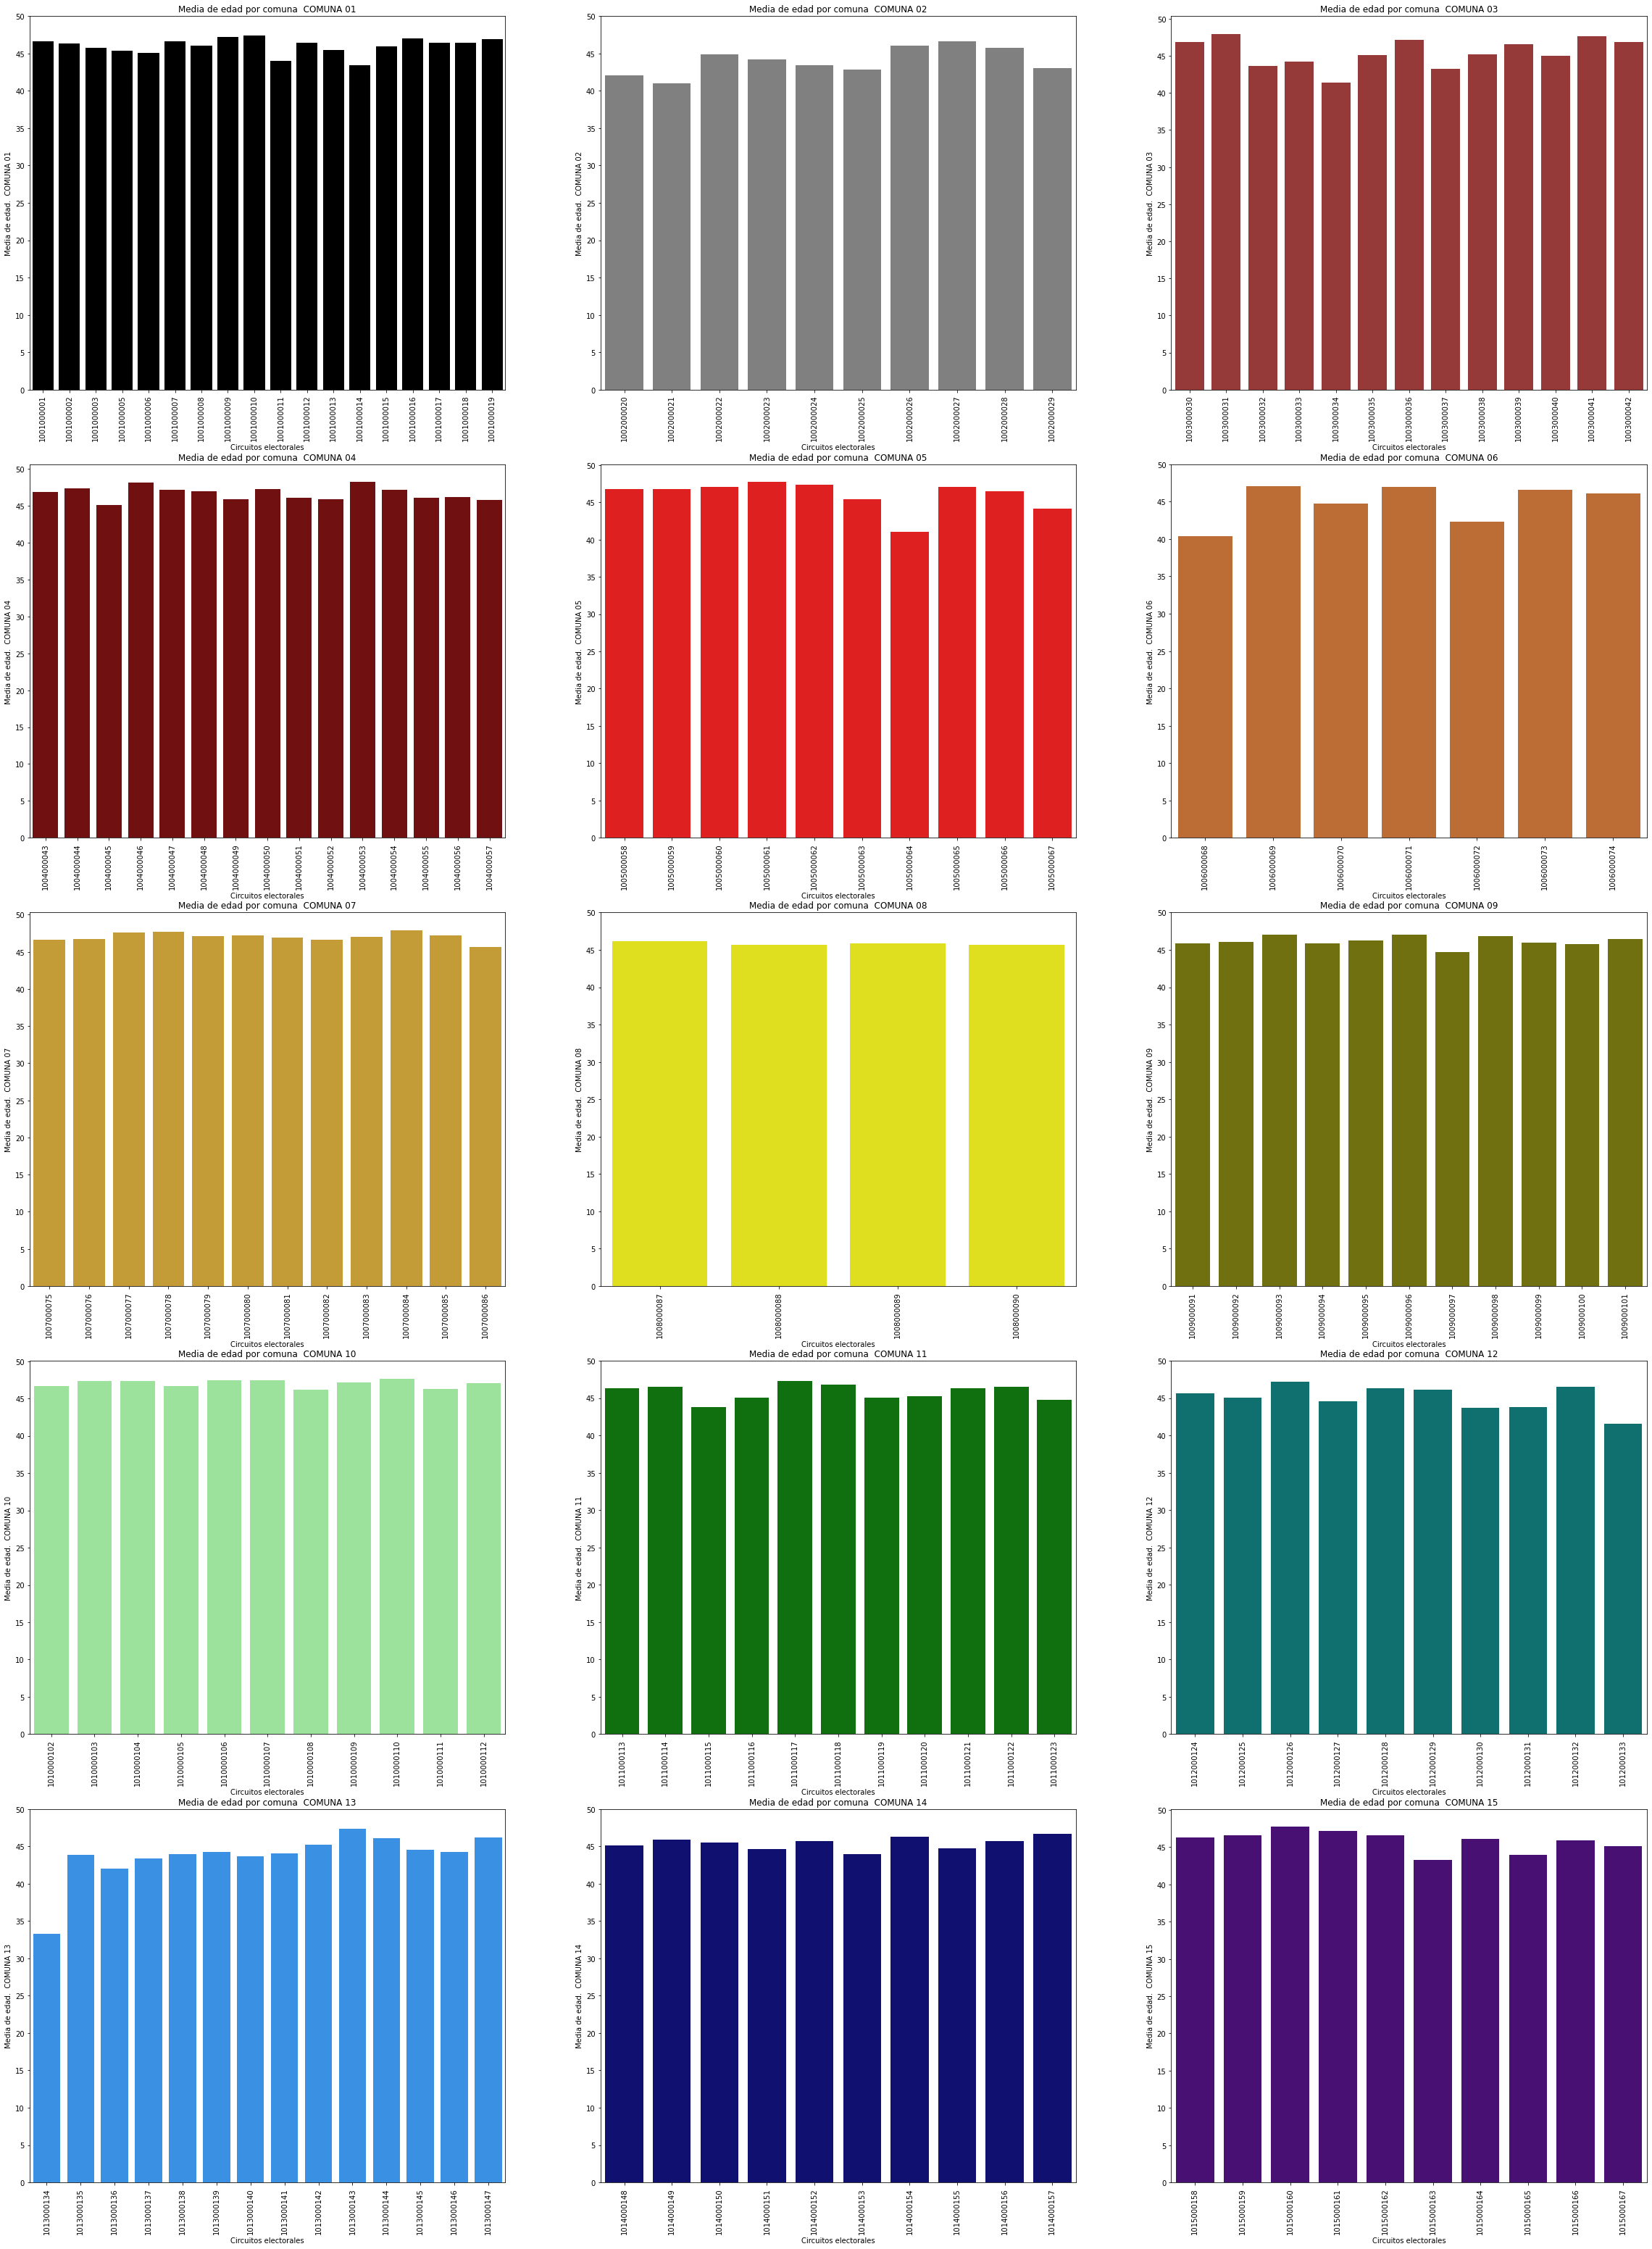

In [112]:

fig_dims = (40,55)
lista_comunas = m16_gdf['NOMBRE_REGION'].drop_duplicates().to_list()
comuna= 0


yticks = range(0,55,5)
colores = ['k', 'grey', 'brown', 'maroon', 'r', 'chocolate', 'goldenrod','yellow', 'olive', 'lightgreen', 'g', 'teal', 'dodgerblue', 'navy', 'indigo']
fig, axes = plt.subplots(5,3,figsize=fig_dims)


rang_filas = m16_gdf['CODIGO_CIRCUITO'][m16_gdf['NOMBRE_REGION'] == lista_comunas[comuna]].index

for i, ax in  enumerate(axes.flat):
    fig = sns.barplot(y = m16_gdf.loc[rang_filas,'P03_mean'], x = m16_gdf.loc[rang_filas,'CODIGO_CIRCUITO'], data= m16_gdf, color= colores[comuna], ax=ax)
    fig.set(yticks= yticks,xlabel= 'Circuitos electorales', ylabel= f'Media de edad.  {lista_comunas[comuna]}', title= f'Media de edad por comuna  {lista_comunas[comuna]}')
    fig.tick_params(axis='x', rotation=90)

    comuna +=1
    rang_filas = m16_gdf['CODIGO_CIRCUITO'][m16_gdf['NOMBRE_REGION'] == lista_comunas[comuna]].index



Si analizamos el promedio por circuito podemos ver como dentro de cada comuna algunas edades promedio rondan los treinta años, otras los cuarenta, y otras los cincuenta. Vemos que en todos los casos la media de edad se ubica entre los 35 y los 50 años. Exceptuando circuitos particulares tiende a haber una homogeneidad interna en las comunas.

#### Visualizamos la correlación entre el promedio de edad por comuna y el voto al FIT por circuito

In [152]:
df_correlacion_media_circ = m16_gdf[['PORCENTAJE_AGRUPACION_mean', 'P03_mean']]

# Construímos matriz de correlación

matriz_corr_media_circ = df_correlacion_media_circ.corr()
matriz_corr_media_circ


,PORCENTAJE_AGRUPACION_mean,P03_mean
PORCENTAJE_AGRUPACION_mean,1.000000,0.191751
P03_mean,0.191751,1.000000


Podemos observar que la correlación existente entre la media de edad por circuito y los votos totales al FIT para mas baja pero continua siendo positiva

Dada la dispersión de los datos decidimos tambien probar la mediana como medida de tendencia central, ya que se presentan edades extremas (superiores a 100 años) que pueden distorsionar la media tirandola para arriba.


#### Mediana de edad por comuna

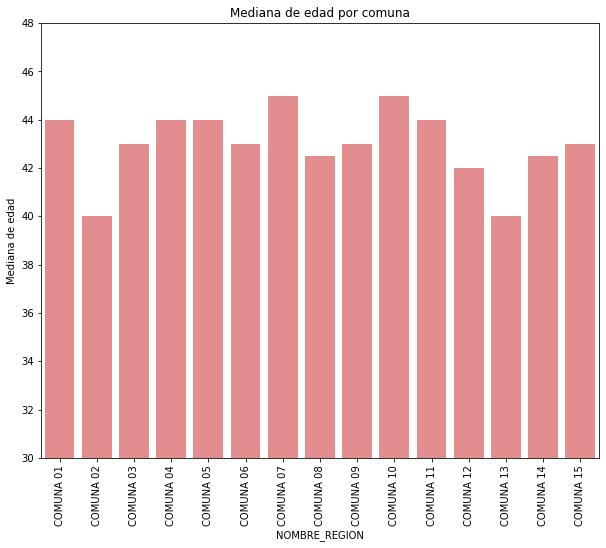

In [131]:
plt.subplots(figsize = (10,8))
fig = sns.barplot(data= gr2, x= 'NOMBRE_REGION', y= 'P03_median', color="lightcoral")
fig.set(ylabel= "Mediana de edad", title= 'Mediana de edad por comuna', ylim= (30,48))
fig.tick_params(axis='x', rotation=90)

La mediana de edad ronda entre los 37 años y los 48 años, frente al promedio que iba entre los 40 años y los 48. La mediana más baja (al igual que el promedio) es la de la comuna 8 con 37 años y la más alta (al igual que el promedio) es la de la comuna 2, con casi 48 años.

#### Visualizamos la correlación entre la mediana de edad por comuna y el voto al FIT por comuna

In [155]:
df_correlacion_media_comuna = gr2[['PORCENTAJE_AGRUPACION', 'P03_median']]

# Construímos matriz de correlación

matriz_corr_mediana_comuna = df_correlacion_media_comuna.corr()
matriz_corr_mediana_comuna

,PORCENTAJE_AGRUPACION,P03_median
PORCENTAJE_AGRUPACION,1.000000,0.643809
P03_median,0.643809,1.000000


Podemos observar que la correlación existente entre la mediana de edad por comuna y el porcentaje de votos al FIT para presidencia es más alta que en la de la media, lo cual podría ser explicado porque la mediana es menos sensible a los valres extremos. 

#### Mediana de edad por circuito electoral

IndexError: list index out of range

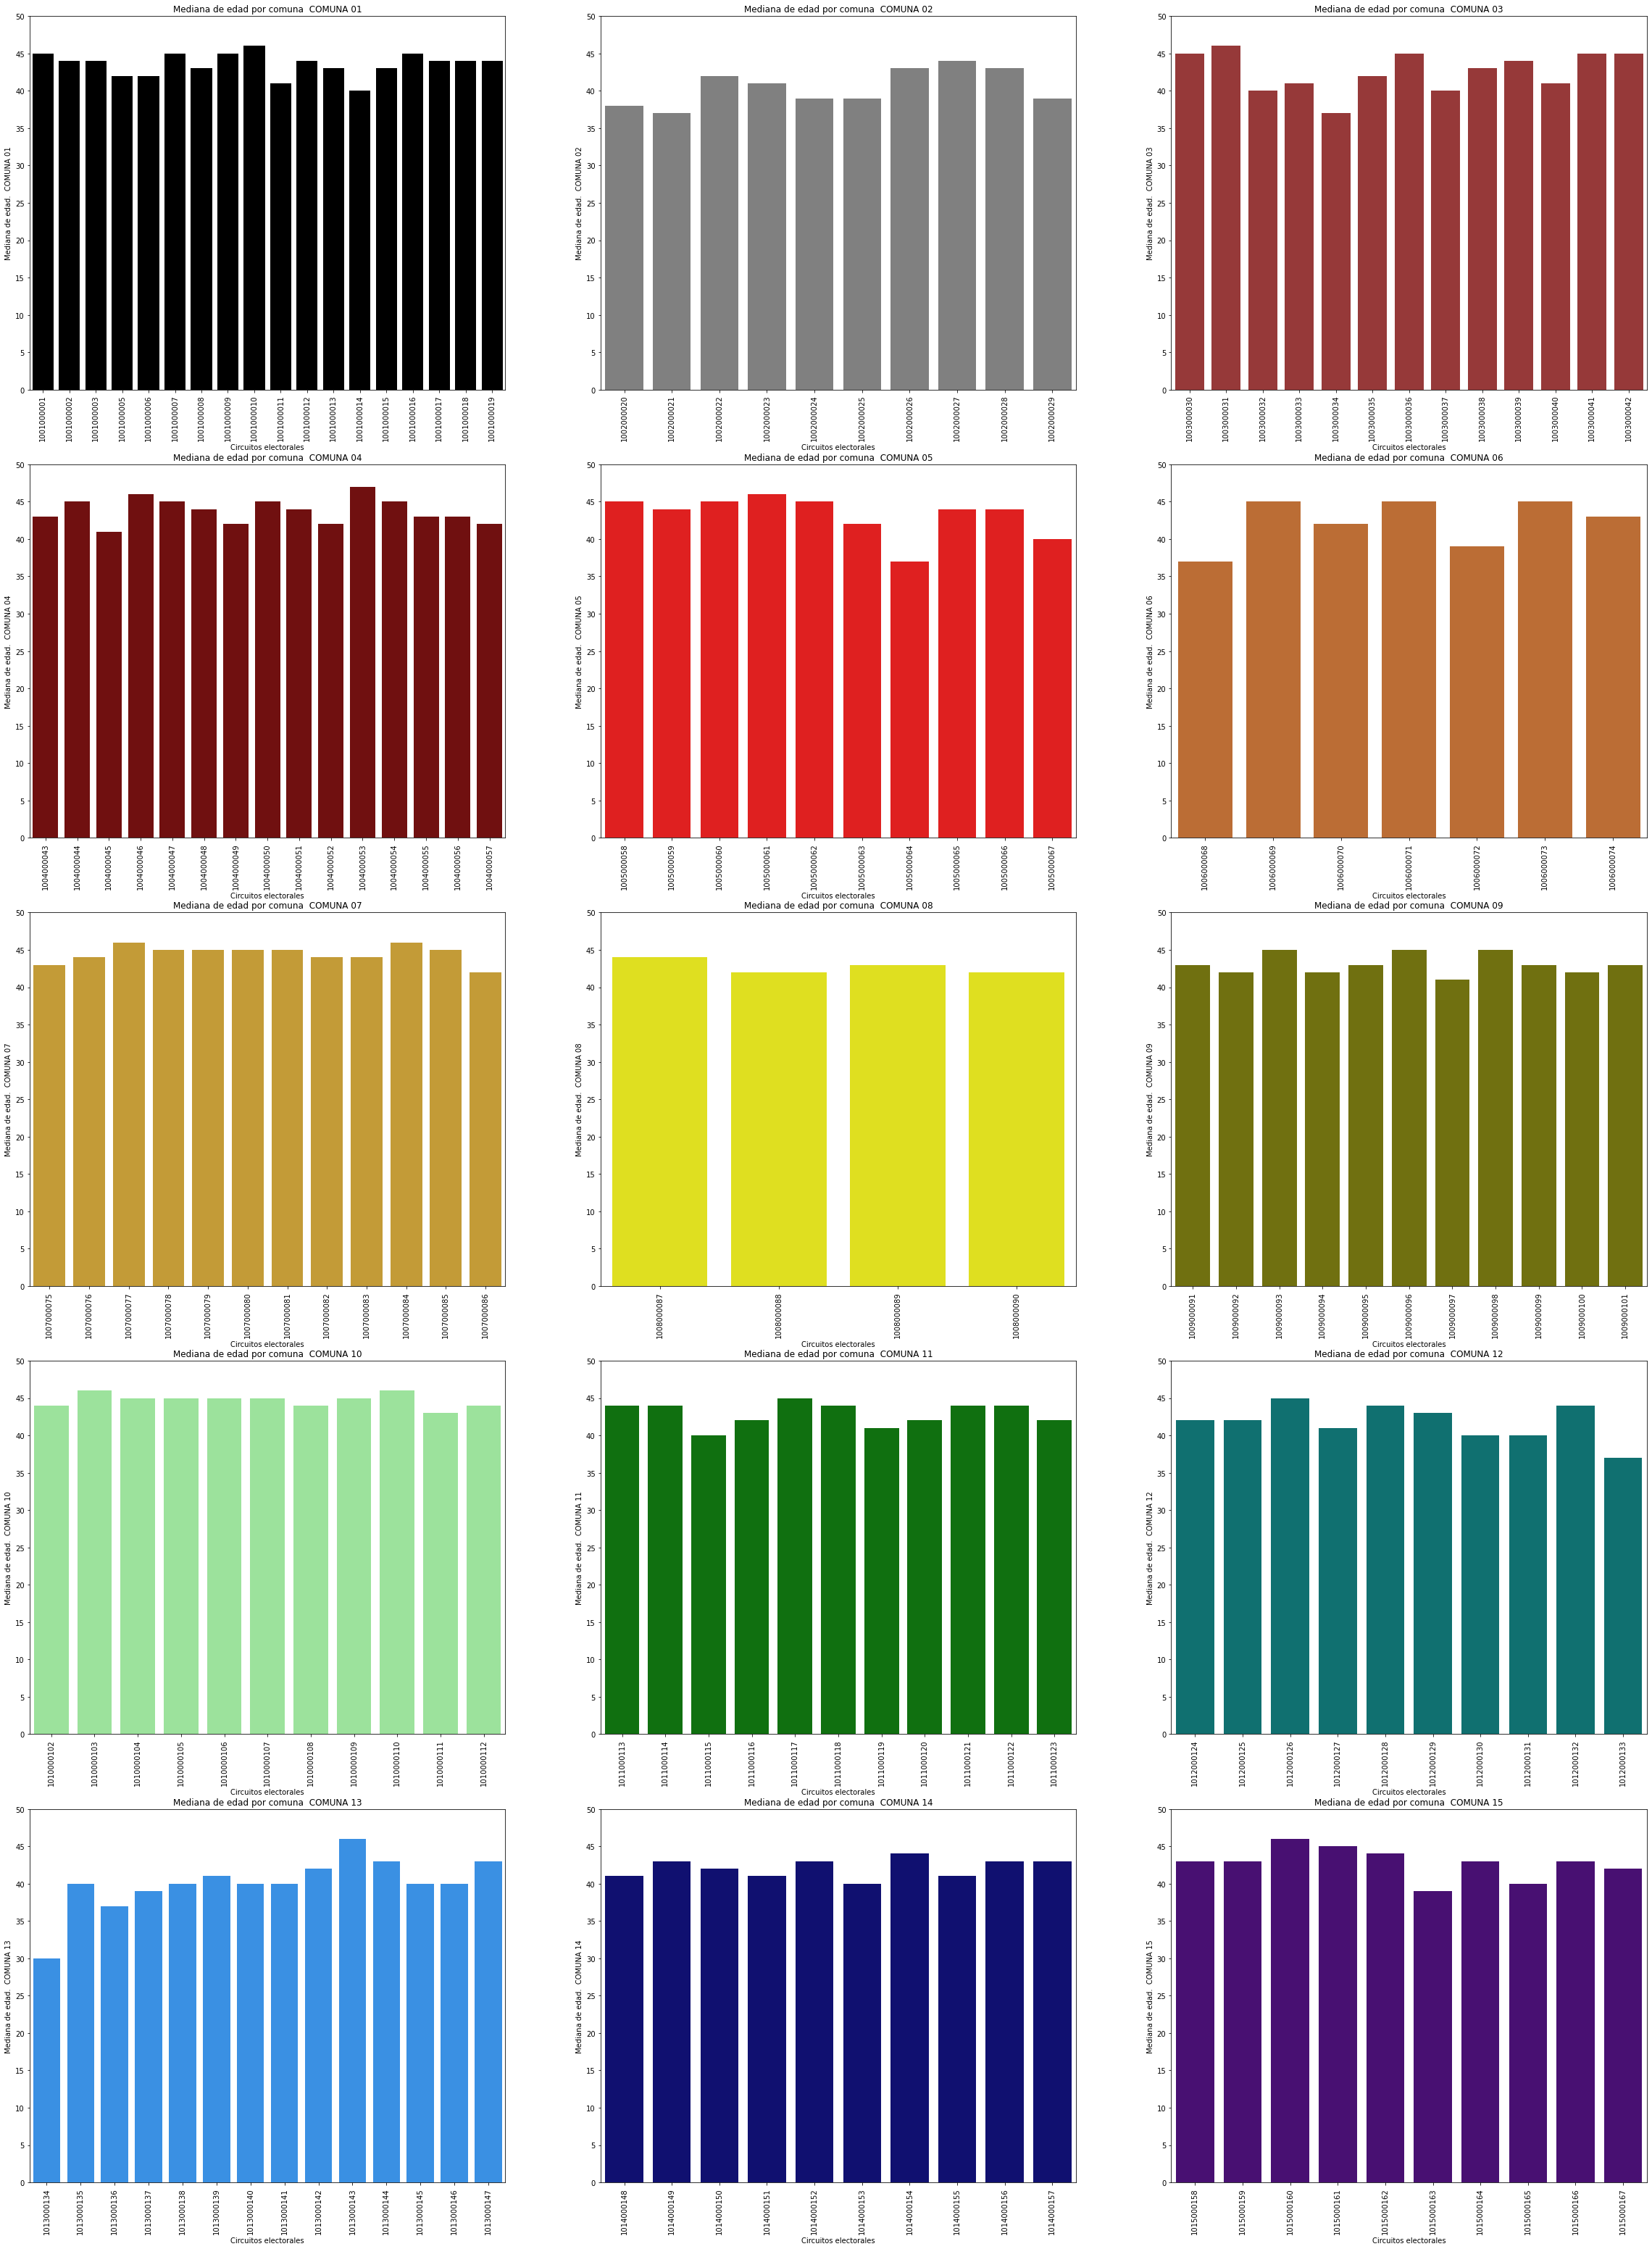

In [113]:
comuna= 0
fig, axes = plt.subplots(5,3,figsize=fig_dims)
rang_filas = m16_gdf['CODIGO_CIRCUITO'][m16_gdf['NOMBRE_REGION'] == lista_comunas[comuna]].index

for i, ax in  enumerate(axes.flat):
    fig = sns.barplot(y = m16_gdf.loc[rang_filas,'P03_median'], x = m16_gdf.loc[rang_filas,'CODIGO_CIRCUITO'], data= m16_gdf, color= colores[comuna], ax=ax)
    fig.set(yticks= yticks,xlabel= 'Circuitos electorales', ylabel= f'Mediana de edad.  {lista_comunas[comuna]}', title= f'Mediana de edad por comuna  {lista_comunas[comuna]}')
    fig.tick_params(axis='x', rotation=90)

    comuna +=1
    rang_filas = m16_gdf['CODIGO_CIRCUITO'][m16_gdf['NOMBRE_REGION'] == lista_comunas[comuna]].index


### Visualizamos la correlación entre la mediana de edad por circuito y el voto al FIT por circuito

In [156]:
df_correlacion_media_circ = m16_gdf[['PORCENTAJE_AGRUPACION_mean', 'P03_median']]

# Construímos matriz de correlación

matriz_corr_mediana_circ = df_correlacion_media_circ.corr()
matriz_corr_mediana_circ


,PORCENTAJE_AGRUPACION_mean,P03_median
PORCENTAJE_AGRUPACION_mean,1.000000,0.180485
P03_median,0.180485,1.000000


 De nuevo, al analizar por circuito la correlación sigue siendo positiva pero es más débil

#### Visualizamos el conjunto de correlaciones

In [159]:
print("Correlación entre la media de edad por comuna y los votos al FIT por comuna \n", matriz_corr_media_comuna, "\n\n")

print("Correlación entre la media de edad por circuito y los votos al FIT por circuito \n", matriz_corr_media_circ, "\n\n")

print("Correlación entre la mediana de edad por comuna y los votos al FIT por comuna \n", matriz_corr_mediana_comuna, "\n\n")

print("Correlación entre la mediana de edad por circuito y los votos al FIT por circuito \n", matriz_corr_mediana_circ, "\n\n")

Correlación entre la media de edad por comuna y los votos al FIT por comuna 
                        PORCENTAJE_AGRUPACION  P03_mean
PORCENTAJE_AGRUPACION               1.000000  0.572308
P03_mean                            0.572308  1.000000 


Correlación entre la media de edad por circuito y los votos al FIT por circuito 
                             PORCENTAJE_AGRUPACION_mean  P03_mean
PORCENTAJE_AGRUPACION_mean                    1.000000  0.191751
P03_mean                                      0.191751  1.000000 


Correlación entre la mediana de edad por comuna y los votos al FIT por comuna 
                        PORCENTAJE_AGRUPACION  P03_median
PORCENTAJE_AGRUPACION               1.000000    0.643809
P03_median                          0.643809    1.000000 


Correlación entre la mediana de edad por circuito y los votos al FIT por circuito 
                             PORCENTAJE_AGRUPACION_mean  P03_median
PORCENTAJE_AGRUPACION_mean                    1.000000    0.180485
P0

Como podemos observar, en casi todos los casos existe una correlación media positiva entre las medidas de tendencia central vinculadas a la edad y los porcentajes de votos para presidente obtenidos por el FIT en cada uno de los circuitos electorales. 

#### Comparación mediana y promedio de edades por comuna

(30.0, 55.0)

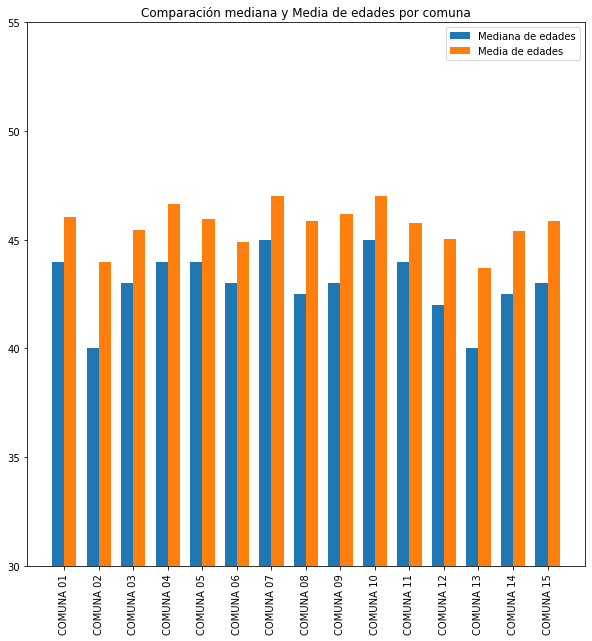

In [121]:
x = np.arange(len(lista_comunas))  
width = 0.35  

fig, ax = plt.subplots(figsize= (10,10))
rects1 = ax.bar(x - width/2, gr2['P03_median'], width, label='Mediana de edades')
rects2 = ax.bar(x + width/2, gr2['P03_mean'], width, label='Media de edades')


ax.set_title('Comparación mediana y Media de edades por comuna')
ax.set_xticks(x)
ax.set_xticklabels(lista_comunas)
ax.legend()

plt.xticks(rotation=90)

plt.ylim(30,55)



#### Podemos observar que en todas las comunas la mediana es menor que la media. 
Dado que se presenta una correlación más fuerte entre la mediana de edad y el voto al FIT que entre la media de edad y el mismo y a partir del gráfico podríamos llegar a inferir que el hecho de que haya una mayor correlación podría deberse a que en este caso en todas las comunas la medida de tendencia central vinculada a la edad es menor.  
